In [1]:
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt

from pydub import AudioSegment
from pydub.utils import db_to_float 

In [2]:
default_rate = 44100
default_freq = 400  # Hz
default_length = 2  # sec
default_amp = 0.999

In [3]:
def numpy_to_audio_segment(audio_arr, amp=1.0, rate=default_rate, channels=1, sample_width=4):
    audio_arr = audio_arr / (abs(audio_arr).max())
    audio_arr_trans = ((2**(8*sample_width-1)-1) * amp * audio_arr).astype(np.int32)
    audio_segment = AudioSegment(audio_arr_trans.tobytes(),
                                 frame_rate=rate,
                                 sample_width=sample_width,
                                 channels=channels)
    return audio_segment

def audio_segment_to_numpy(seg, th=1.0):
    frame_rate = seg.frame_rate
    seg_arr = np.array(seg.get_array_of_samples())
    seg_arr = th * seg_arr / seg.max_possible_amplitude
    return seg_arr, frame_rate

In [4]:
def generate_sound(freq=default_freq, rate=default_rate, length=default_length, amp=default_amp, db=None):
    if db:
        amp = db_to_float(db)
    sound_arr = np.sin(2 * np.pi * np.arange(rate*length) * freq/rate)
    return numpy_to_audio_segment(sound_arr, amp=amp, rate=rate)

# loudness

In [12]:
import librosa
from ipywidgets import interact

In [13]:
freq = 500
amp = 0.1
generate_sound(freq=freq, amp=amp)

In [14]:
freq = 500
amp = 0.01
generate_sound(freq=freq, amp=amp)

In [15]:
freq = 500
amp = 0.0005
generate_sound(freq=freq, amp=amp)

In [16]:
freq = 500
amp = 0.00005
generate_sound(freq=freq, amp=amp)

In [17]:
freq = 3000
amp = 0.001
generate_sound(freq=freq, amp=amp)

In [18]:
freq = 3000
amp = 0.00005
generate_sound(freq=freq, amp=amp)

## loudness on db

In [19]:
def plot_a_weighting(scale):
    frequencies = np.arange(10, 10000, 10)
    weighting = librosa.A_weighting(frequencies)
    plt.plot(np.log(frequencies), -weighting+scale)

In [20]:
def generate_and_view_sound(freq, db, scale):
    plot_a_weighting(scale)
    plt.scatter(np.log(freq), db)
    return generate_sound(freq, db=db)

In [21]:
interact(generate_and_view_sound, freq=(100,3000, 100), db=(-100, 0, 1), scale=(-80, 0, 1))

interactive(children=(IntSlider(value=1500, description='freq', max=3000, min=100, step=100), IntSlider(value=…

<function __main__.generate_and_view_sound(freq, db, scale)>

# masking

https://www.jstage.jst.go.jp/article/audiology1968/36/2/36_2_70/_pdf/-char/ja

In [73]:
def pure_tone(freq, phase=0, rate=default_rate, length=default_length):
    sound_arr = np.sin(2 * np.pi * np.arange(rate*length) * freq/rate + phase)
    return sound_arr

In [128]:
width = 80
freq_center = 400
freqs = np.arange(freq_center-width, freq_center+width, 0.1)
rate = default_rate
length = default_length
sound_arr = np.zeros(length * rate)
for idx, freq in enumerate(freqs):
#     sound_arr += np.sin(2 * np.pi * np.arange(rate*length) * freq/rate)
    sound_arr += np.sin(2 * np.pi * np.arange(rate*length) * freq/rate + 3 * np.pi * idx * rate / (freq_center * freqs.shape[0]))
sound_arr = sound_arr / sound_arr.max()

In [129]:
numpy_to_audio_segment(sound_arr, amp=1.0)

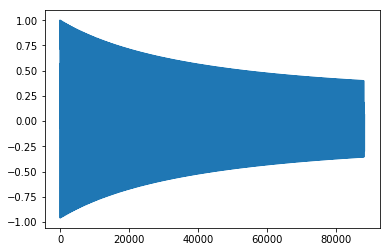

In [130]:
plt.plot(sound_arr)

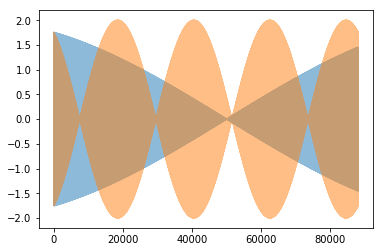

In [135]:
plt.plot(pure_tone(400) + pure_tone(400.3, 1), alpha=0.5)
plt.plot(pure_tone(400) + pure_tone(402, 1), alpha=0.5)

In [48]:
pure_tone(400)

(800,)

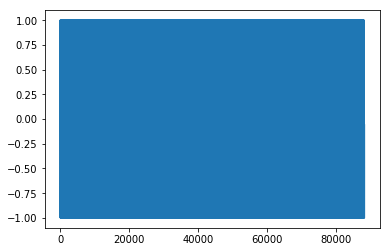

In [58]:
plt.plot(np.sin(2 * np.pi * np.arange(rate*length) * freq/rate))

In [57]:
rate

44100